In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [177]:
pd.set_option('max_columns', None)

In [178]:
df = pd.read_csv("./datasets/database.csv", low_memory=False)
df.head(10)

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
5,6,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,Yes,Male,30,White,Unknown,Male,36,White,Unknown,Acquaintance,Rifle,0,0,FBI
6,7,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,Yes,Female,42,Native American/Alaska Native,Unknown,Male,27,Black,Unknown,Wife,Knife,0,0,FBI
7,8,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,1,Murder or Manslaughter,Yes,Female,99,White,Unknown,Male,35,White,Unknown,Wife,Knife,0,0,FBI
8,9,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,2,Murder or Manslaughter,No,Male,32,White,Unknown,Unknown,0,Unknown,Unknown,Unknown,Firearm,0,0,FBI
9,10,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,3,Murder or Manslaughter,Yes,Male,38,White,Unknown,Male,40,Unknown,Unknown,Unknown,Firearm,0,1,FBI


In [179]:
df.shape

(638454, 24)

In [180]:
df.corr()

,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
Record ID,1.000000,0.997286,0.116943,0.004774,0.026973,0.056755
Year,0.997286,1.000000,0.124125,0.005514,0.026765,0.055959
Incident,0.116943,0.124125,1.000000,-0.006918,0.001781,0.001951
Victim Age,0.004774,0.005514,-0.006918,1.000000,-0.008047,-0.017289
Victim Count,0.026973,0.026765,0.001781,-0.008047,1.000000,0.067284
Perpetrator Count,0.056755,0.055959,0.001951,-0.017289,0.067284,1.000000


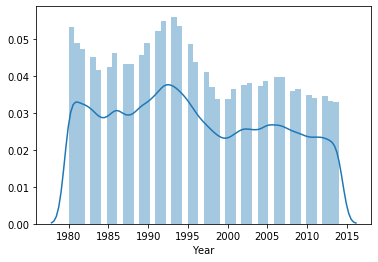

In [181]:
sns.distplot(df["Year"])

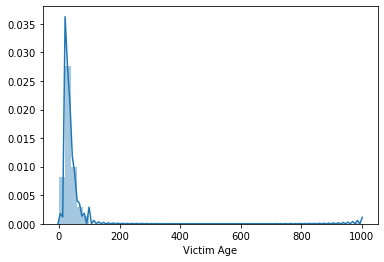

In [182]:
sns.distplot(df["Victim Age"])

In [190]:
df["Victim Age"].value_counts().sort_index(ascending=True)[:10] # we have age 0 and 998 this is realy bad
# We are going to delete them with intercuatil range

0    8444
1    5525
2    3805
3    2378
4    1659
5    1194
6     999
7     915
8     852
9     834
Name: Victim Age, dtype: int64

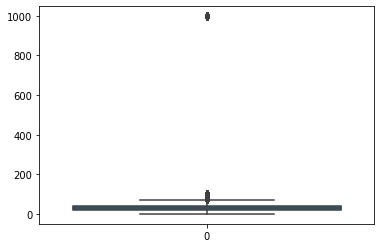

In [184]:
sns.boxplot(data=df["Victim Age"])

In [188]:
q25,q75 = df["Victim Age"].quantile([.25, .75])
iqr = q75 - q25
_min = q25 - 1.5 * iqr
_max = q75 + 1.5 * iqr
df = df[df["Victim Age"].between(_min,_max)]
df.shape

(603277, 24)

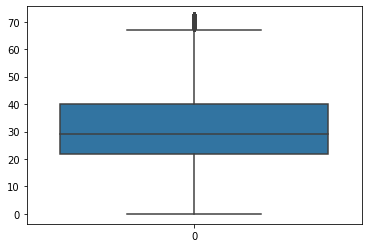

In [189]:
sns.boxplot(data=df_filtered["Victim Age"])